In [354]:
# Importando as bases
import pandas as pd

arquivo = '/content/drive/MyDrive/titanic_competition/titanic_train2.csv'
arquivo1 = '/content/drive/MyDrive/titanic_competition/titanic_teste2.csv'

treino = pd.read_csv(arquivo)
teste = pd.read_csv(arquivo1)

In [355]:
# Visualizando importações
treino.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,male_check
0,1,0,3,22.0,1,0,7.2500,0,0,1,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,1


In [356]:
# Visualizando importações
teste.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,male_check
0,892,3,34.5,0,0,7.8292,0,1,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,1
3,895,3,27.0,0,0,8.6625,0,0,1,1
4,896,3,22.0,1,1,12.2875,0,0,1,0


In [357]:
# Descrição estatística da base
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,male_check
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.430535,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028,0.647587
std,257.353842,0.486592,0.836071,13.551396,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.724891,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,36.750000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [358]:
# Descrição estatítica de duas colunas
treino[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.430535,32.204208
std,13.551396,49.693429
min,0.420000,0.000000
25%,21.000000,7.910400
50%,28.724891,14.454200
75%,36.750000,31.000000
max,80.000000,512.329200


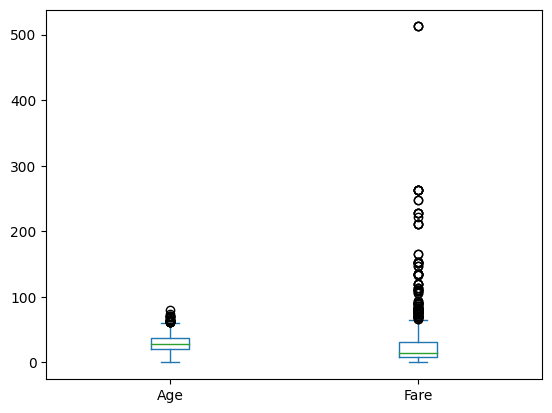

In [359]:
# Boxplot das duas colunas
treino[['Age', 'Fare']].plot.box();

### A escala das colunas **Age** e **Fare** está com valores discrepantes em relação as demais colunas e isso pode influenciar o modelo.
- Utilizaremos um escalonador para padronizar essas colunas:<br>
[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [360]:
# Utilizando um escalonador e ajustando os dados
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(treino[['Age', 'Fare']])

In [361]:
# Tranformando os dados e sobrescrevendo-os
treino[['Age', 'Fare']] = transformer.transform(treino[['Age', 'Fare']])

In [362]:
# Fazendo o mesmo com a base de teste
transformer = StandardScaler().fit(teste[['Age', 'Fare']])
teste[['Age', 'Fare']] = transformer.transform(teste[['Age', 'Fare']])

In [363]:
treino.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [364]:
# Porcentagem de irmãos e/ou cônjuges a bordo
treino.SibSp.value_counts(normalize=True).mul(100)

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

In [365]:
# Verificando a taxa de sobrevivencia
SibSp_df = treino.groupby('SibSp')['Survived'].agg(['sum','count','mean']).reset_index()
SibSp_df.columns = ['SibSp','sobrev','total','tx_sobrev']
SibSp_df

,SibSp,sobrev,total,tx_sobrev
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [366]:
# 'Parch' numero de pais e/ou filhos a bordo
# Verificando a taxa de sobrevivencia
Parch_df = treino.groupby('Parch')['Survived'].agg(['sum','count','mean']).reset_index()
Parch_df.columns = ['Parch','sobrev','total','tx_sobrev']
Parch_df

,Parch,sobrev,total,tx_sobrev
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


In [367]:
# Relacionando-os e criando uma nova coluna
treino['Familiares'] = treino.SibSp + treino.Parch

In [368]:
# Contando os valores
treino.Familiares.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Familiares, dtype: int64

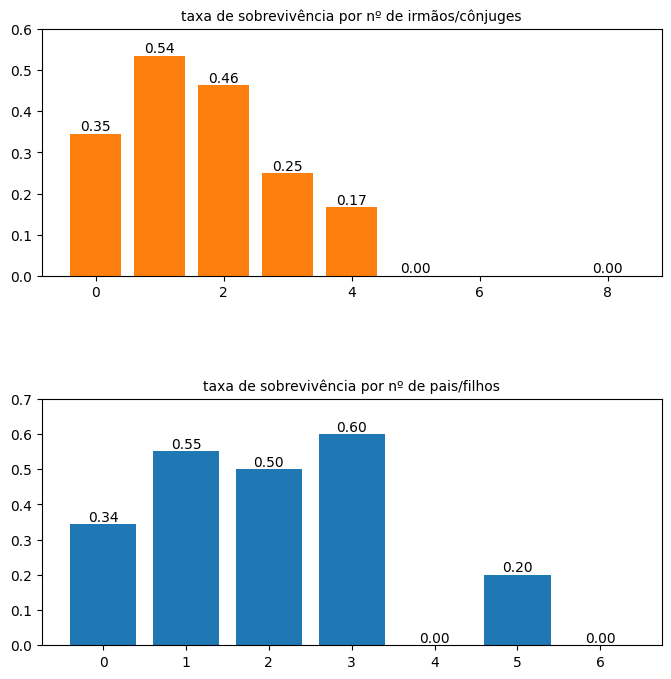

In [369]:
# Visualizando as informações em forma de gráfico

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, figsize=(8,8))
ax[0].bar(SibSp_df.SibSp, SibSp_df.tx_sobrev)
labels1 = ax[0].bar(SibSp_df.SibSp, SibSp_df.tx_sobrev)
ax[0].bar_label(labels1,fmt="%.02f")
ax[0].set(ylim=(0,0.6))
ax[0].set_title('taxa de sobrevivência por nº de irmãos/cônjuges', fontsize=10)



labels2 = ax[1].bar(Parch_df.Parch, Parch_df.tx_sobrev)
ax[1].bar_label(labels2,fmt="%.02f")
ax[1].set(ylim=(0,0.7))
ax[1].set_title('taxa de sobrevivência por nº de pais/filhos', fontsize=10)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [370]:
# Removendo colunas não mais necessárias
treino = treino.drop(['SibSp', 'Parch'], axis=1)

In [371]:
treino.head(3)

,PassengerId,Survived,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,male_check,Familiares
0,1,0,3,-0.548630,-0.502445,0,0,1,1,1
1,2,1,1,0.632723,0.786845,1,0,0,0,1
2,3,1,3,-0.253292,-0.488854,0,0,1,0,0


In [372]:
# O mesmo para a base de teste
teste['Familiares'] = teste.SibSp + teste.Parch
teste = teste.drop(['SibSp', 'Parch'], axis=1)

### Correlação das variaveis

In [373]:
# Analisando a correlação entre as features
treino.corr()

,PassengerId,Survived,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,male_check,Familiares
PassengerId,1.000000,-0.005007,-0.035144,0.043812,0.012658,-0.001205,-0.033606,0.022204,0.042939,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.076864,0.257307,0.168240,0.003650,-0.149683,-0.543351,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.404313,-0.549500,-0.243292,0.221009,0.074053,0.131900,0.065997
Age,0.043812,-0.076864,-0.404313,1.000000,0.114528,0.052414,-0.103491,0.019210,0.124832,-0.284816
Fare,0.012658,0.257307,-0.549500,0.114528,1.000000,0.269335,-0.117216,-0.162184,-0.182333,0.217138
Embarked_C,-0.001205,0.168240,-0.243292,0.052414,0.269335,1.000000,-0.148258,-0.782742,-0.082853,-0.046215
Embarked_Q,-0.033606,0.003650,0.221009,-0.103491,-0.117216,-0.148258,1.000000,-0.499421,-0.074115,-0.058592
Embarked_S,0.022204,-0.149683,0.074053,0.019210,-0.162184,-0.782742,-0.499421,1.000000,0.119224,0.077359
male_check,0.042939,-0.543351,0.131900,0.124832,-0.182333,-0.082853,-0.074115,0.119224,1.000000,-0.200988
Familiares,-0.040143,0.016639,0.065997,-0.284816,0.217138,-0.046215,-0.058592,0.077359,-0.200988,1.000000


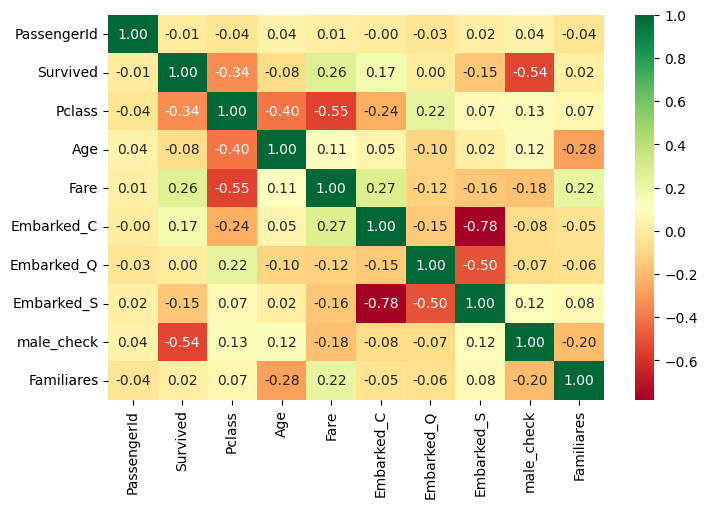

In [374]:
# Visualizando a correlação entre as features
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,5))

sns.heatmap(treino.corr(), annot=True, cmap='RdYlGn', fmt='.2f')

plt.show()

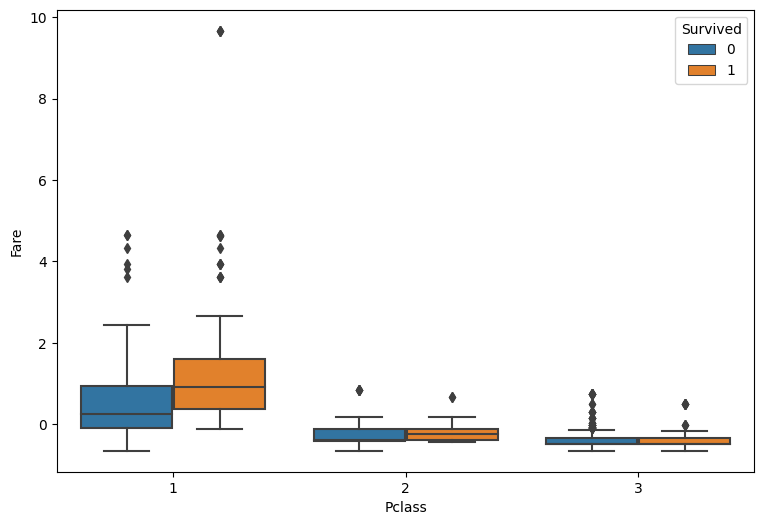

In [375]:
# Visualizando a relação entre Tarifa e Classe
fig, ax = plt.subplots(figsize=(9,6))

sns.boxplot(data=treino, x='Pclass', y='Fare', hue='Survived')

plt.show()

In [376]:
treino.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [377]:
treino.groupby(['male_check', 'Pclass'])['Survived'].agg(['count', 'sum', 'mean'])

count  sum      mean
male_check Pclass                      
0          1          94   91  0.968085
           2          76   70  0.921053
           3         144   72  0.500000
1          1         122   45  0.368852
           2         108   17  0.157407
           3         347   47  0.135447

### male_check:<br>
- **0**: não é homem, ou seja mulher.
- **1**: é homem.<br>
Os números mostram enormes diferenças nos índices de sobrevivência das diferentes classes a bordo do navio, especialmente entre as mulheres e crianças. Apesar de menos de 10% das mulheres da **primeira** e **segunda classe** juntas terem morrido, 54% daquelas na **terceira** pereceram. Similarmente, cinco das seis crianças na **primeira classe** e todas da **segunda classe** sobreviveram, porém 52 das 79 na **terceira** morreram.<br>
[Fonte](https://pt.wikipedia.org/wiki/RMS_Titanic)

Também lendo a história identificamos que existe sim **relação de ordem** na coluna **Embarked**, ouve uma sequência de embarque.<br>
[Fonte](https://pt.wikipedia.org/wiki/RMS_Titanic)

In [378]:
# Importando a base primitiva
treino2 = pd.read_csv('/content/drive/MyDrive/titanic_competition/titanic_train.csv')
teste2 = pd.read_csv('/content/drive/MyDrive/titanic_competition/titanic_test.csv')

In [379]:
# Filtrando e substituindo valores nulos da coluna Embarked
treino2['Embarked'] = treino2.Embarked.fillna('S')

In [380]:
# Dropando as colunas do OneHotEncoder
treino = treino.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)
teste = teste.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)

In [381]:
# Verificando as info
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   male_check   891 non-null    int64  
 6   Familiares   891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [382]:
# Importando o OrdinalEncoder
# E instanciando parametros
from sklearn.preprocessing import OrdinalEncoder

categorias = ['S', 'C', 'Q']

oe = OrdinalEncoder(
    categories=[categorias], dtype='int32',
)

In [383]:
# Ajustando dados da coluna
oe = oe.fit(treino2[['Embarked']])

In [384]:
# Criando novamente a coluna Embarked já transformada
treino['Embarked'] = oe.transform(treino2[['Embarked']])

In [385]:
# Fazendo o mesmo para a base de teste
oe = oe.fit(teste2[['Embarked']])
teste['Embarked'] = oe.transform(teste2[['Embarked']])

## Usando a nova base no modelo

- Será utilizado os mesmos modelos vistos anteriormente
 - Árvore de Classificação:<br>
 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier <br>
 - KNN: <br>
 https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier <br>
 - Regressão Logistica (**é utilizada para classificação**): <br>
 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression <br>
 - treino e teste ou validação: <br>
 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [386]:
# Vendo o resultado
treino.head(2)

,PassengerId,Survived,Pclass,Age,Fare,male_check,Familiares,Embarked
0,1,0,3,-0.548630,-0.502445,1,1,0
1,2,1,1,0.632723,0.786845,0,1,1


In [387]:
# Separando em X e y
X = treino.drop(['PassengerId', 'Survived'], axis=1)
y = treino.Survived

In [388]:
# Separando em treino e validação
from sklearn.model_selection import train_test_split

RANDOM_STATE=1

Xtrain, Xval, ytrain, yval = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [389]:
# Importando e instanciando os estimadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

clf_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf_knn = KNeighborsClassifier()
clf_log = LogisticRegression(random_state=RANDOM_STATE)

In [390]:
# Ajustando os modelos com os dados de treino
clf_tree = clf_tree.fit(Xtrain, ytrain)
clf_knn = clf_knn.fit(Xtrain, ytrain)
clf_log = clf_log.fit(Xtrain, ytrain)

In [391]:
# Fazendo a predição dos dados
y_pred_tree = clf_tree.predict(Xval)
y_pred_knn = clf_knn.predict(Xval)
y_pred_log = clf_log.predict(Xval)

Para avaliar os modelos usaremos a acurácia, pois é a **métrica preferencial da competição**, por meio dela o modelo será avaliado quando submetido.
- Acurácia: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [392]:
# Importando e avaliando os modelos
from sklearn.metrics import accuracy_score

result_tree = accuracy_score(yval, y_pred_tree)
result_knn = accuracy_score(yval, y_pred_knn)
result_log = accuracy_score(yval, y_pred_log)

In [393]:
# Visualizando os resultados
print(result_tree)
print(result_knn)
print(result_log)

0.7686567164179104
0.7761194029850746
0.8171641791044776


In [394]:
# Comparando o Xtrain com a base de teste
Xtrain.head()

,Pclass,Age,Fare,male_check,Familiares,Embarked
445,1,-1.877653,0.999770,1,2,0
650,3,-0.052101,-0.489442,1,0,0
172,3,-2.099157,-0.424256,0,2,0
450,2,0.485054,-0.089684,1,3,0
314,2,1.001896,-0.119886,1,2,0


In [395]:
# Comparando o Xtrain com a base de teste
teste.head()

,PassengerId,Pclass,Age,Fare,male_check,Familiares,Embarked
0,892,3,0.372316,-0.497079,1,0,2
1,893,3,1.326106,-0.511942,0,1,0
2,894,2,2.470655,-0.463770,1,0,2
3,895,3,-0.199959,-0.482143,1,0,0
4,896,3,-0.581475,-0.417167,0,2,0


In [401]:
Xtest = teste.drop('PassengerId', axis=1)

In [402]:
y_pred = clf_log.predict(Xtest)

In [403]:
teste['Survived'] = y_pred

In [404]:
base_kaggle = teste[['PassengerId', 'Survived']]

In [405]:
base_kaggle.to_csv('resultado_e3.csv', index=False)